In [1]:
import receive_data

In [2]:
doc_ranks, queries, query_characteristics = receive_data.loadData(6)

Query :  301
Query :  302
Query :  303
Query :  304
Query :  305
Query :  306
Query :  307
Query :  308
Query :  309
Query :  310
Query :  311
Query :  312
Query :  313
Query :  314
Query :  315
Query :  316
Query :  317
Query :  319
Query :  320
Query :  321
Query :  322
Query :  323
Query :  324
Query :  325
Query :  326
Query :  327
Query :  328
Query :  329
Query :  330
Query :  331
Query :  332
Query :  333
Query :  334
Query :  335
Query :  336
Query :  337
Query :  338
Query :  339
Query :  340
Query :  341
Query :  342
Query :  343
Query :  344
Query :  345
Query :  346
Query :  347
Query :  348
Query :  349
Query :  350


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
CUR_DIR = os.path.dirname(os.path.abspath("./")) + "/"

sys.path.append(CUR_DIR + 'genetic_algorithm')
from genetic_algorithm import create_population, learn_population

In [4]:
learn_population.test(doc_ranks, queries, query_characteristics)

Sqrt(Sqrt(exp(tf)))
[10.60094049107148]


In [10]:
import primitive
import numpy as np

from get_quality import get_quality
from copy import deepcopy
from mutation import mutate_rand_tree
from crossover import crossfit
from create_population import create_random_model
from primitive import Primitives

In [16]:
def vis(population, vals):
    plt.figure(figsize=(10, 5))
    plt.scatter(vals, [pop.get_tokens() for pop in population])
    plt.show()
    print ("!")

In [17]:
def rank_population(population, doc_ranks, queries, query_characteristics):   

    qualities = []
    for model in population:
        quality = get_quality(model, doc_ranks, queries, query_characteristics)
        qualities.append(quality)

    return qualities

C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\primitive.py:73: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\primitive.py:65: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])


39


C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\primitive.py:41: RuntimeWarning: divide by zero encountered in true_divide
  return self.func(*[node.calc(x, y) for node in self.nodes])
C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\primitive.py:41: RuntimeWarning: overflow encountered in exp
  return self.func(*[node.calc(x, y) for node in self.nodes])
C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\get_quality.py:17: RuntimeWarning: invalid value encountered in double_scalars
  result[pos] += values[i]


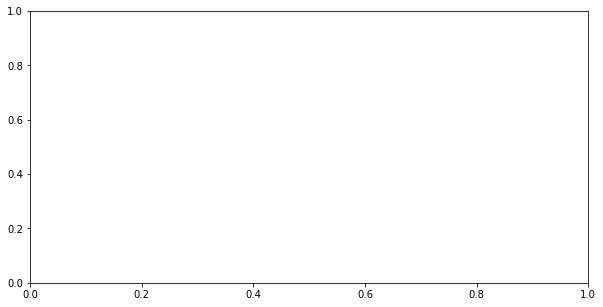

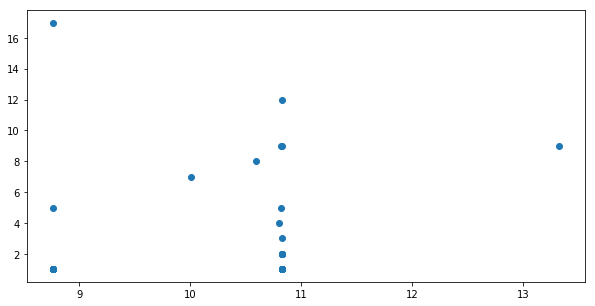

!
-13.3207982608
40


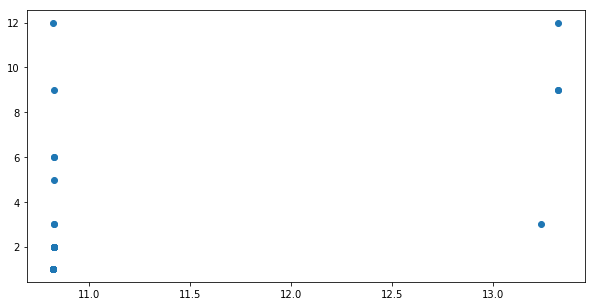

!
-13.3213709973
40


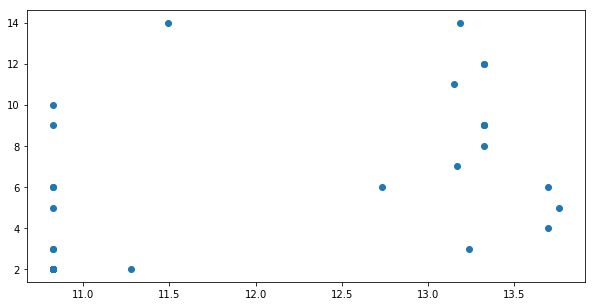

!
-13.7564493405
40


C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\primitive.py:41: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*[node.calc(x, y) for node in self.nodes])


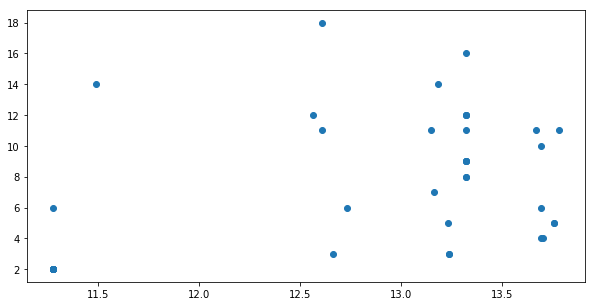

!
-13.7809205944
40


C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\primitive.py:160: RuntimeWarning: invalid value encountered in log10
  LOG = Primitive(lambda x: np.log10(1+x), 1, DOMAINS.POSITIVE, DOMAINS.REAL, 'log')


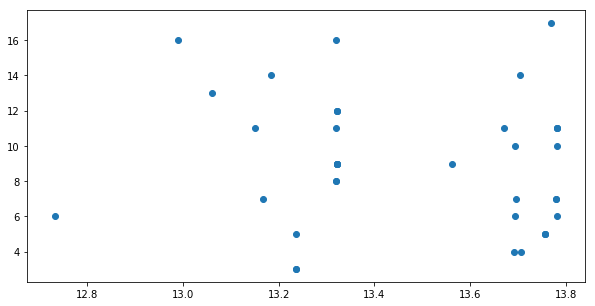

!
-13.7809205944
40


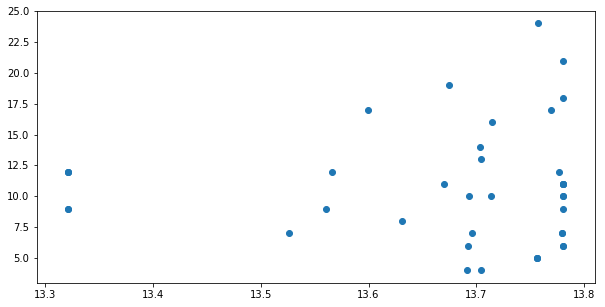

!
-13.7809205944
40


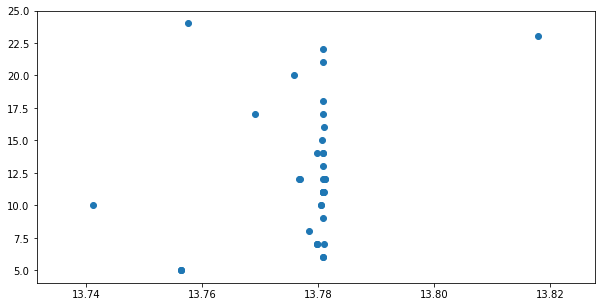

!
-13.8178643309
40


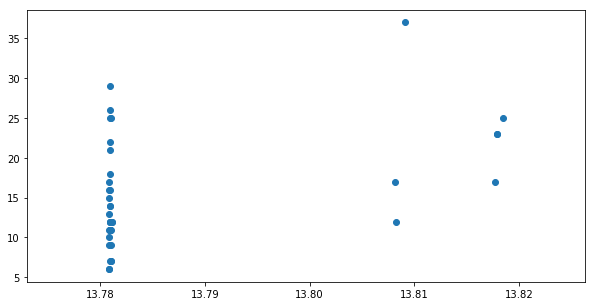

!
-13.8184989859
40


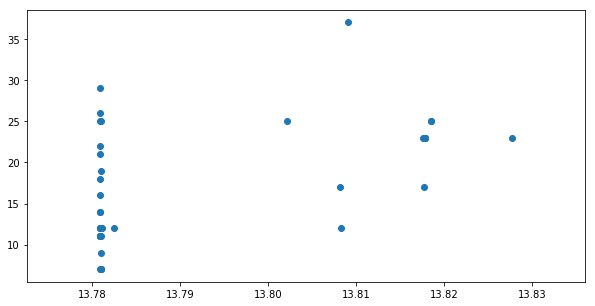

!
-13.8277416814
40


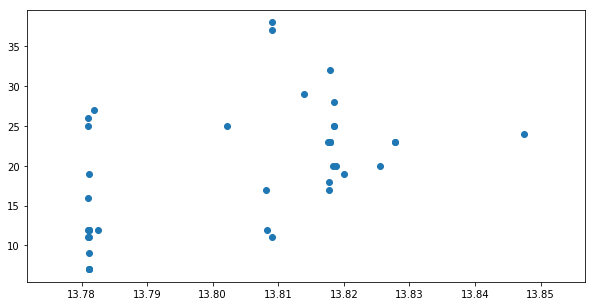

!
-13.84751323
40


C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\primitive.py:41: RuntimeWarning: overflow encountered in true_divide
  return self.func(*[node.calc(x, y) for node in self.nodes])


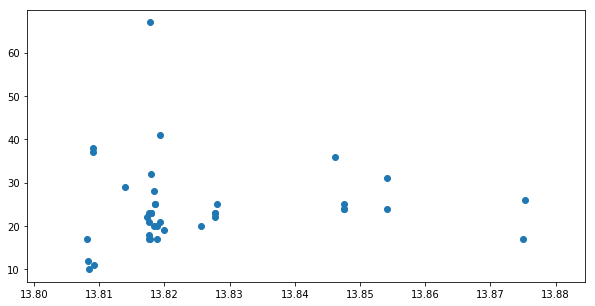

!
-13.87522085
40


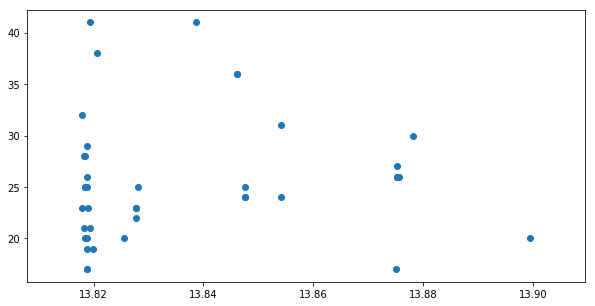

!
-13.8994237657
40


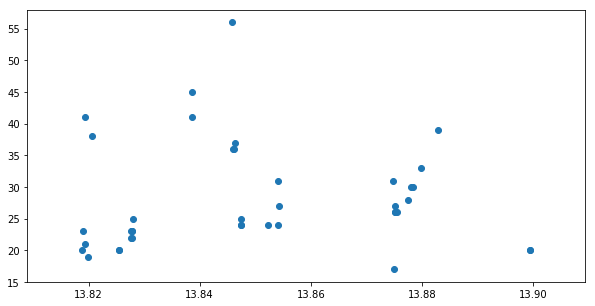

!
-13.8994237657
40


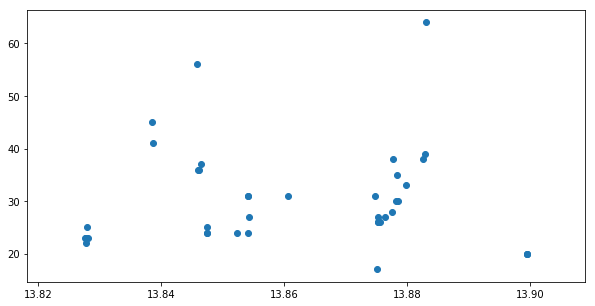

!
-13.8994237657
40


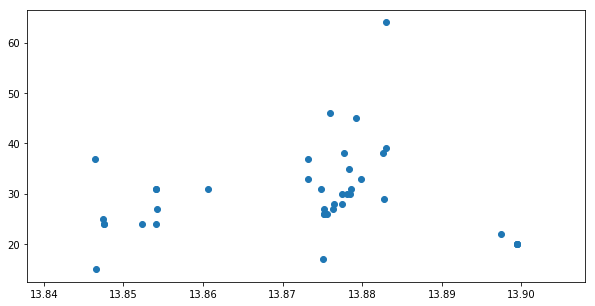

!
-13.8994237657
40


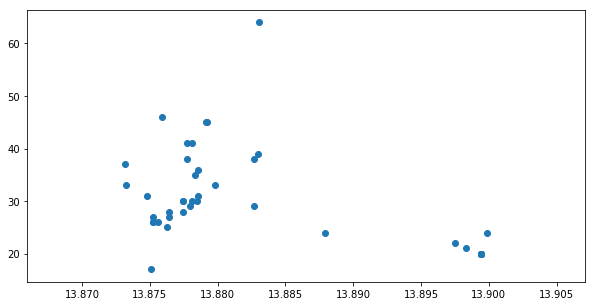

!
-13.8998459569
40


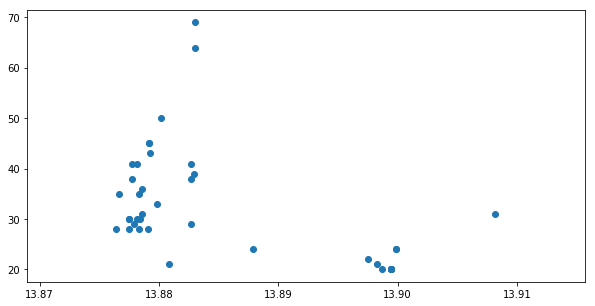

!
-13.9081987526
40


C:\Users\Howl\Desktop\coding\article\Information-retrieval/genetic_algorithm\primitive.py:41: RuntimeWarning: invalid value encountered in true_divide
  return self.func(*[node.calc(x, y) for node in self.nodes])


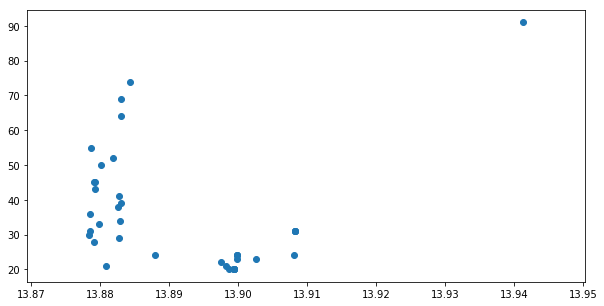

!
-13.9412462385
40


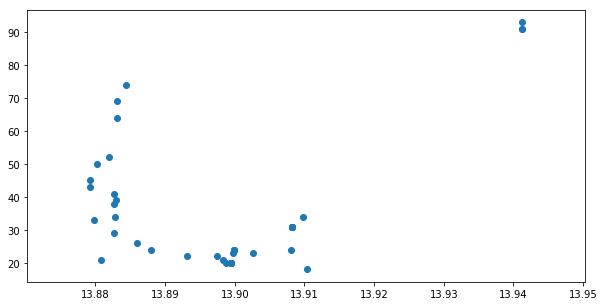

!
-13.9412462385
40


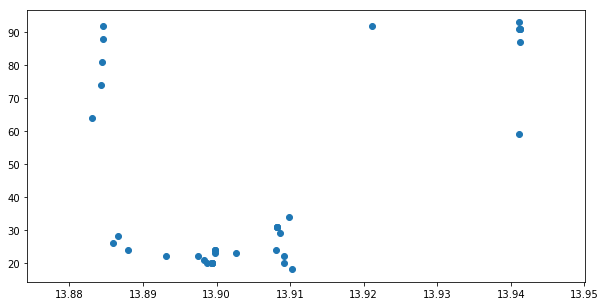

!
-13.9412462385
40


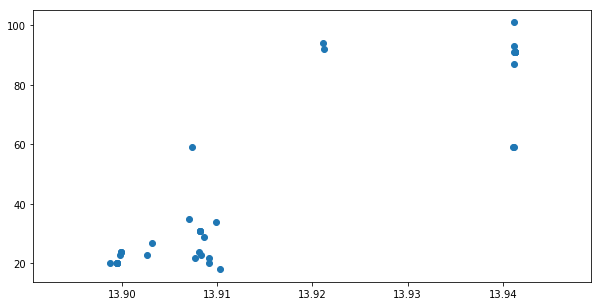

!
-13.9412462385
40


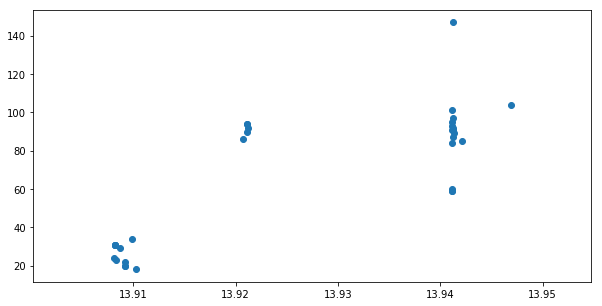

!
-13.9469004007
40


KeyboardInterrupt: 

In [19]:
reit_ = 1e9
last_reit = 1e9
SIMILARITY = 1e-5
size = 40

population = create_population.create_population(size, 5)

for iteration in range(100):
    new_population = []

    sz = len(population)
    print (sz)

    new_population.append(population[0])

    for i in range(sz // 30):
        new_population.append(mutate_rand_tree(population[0]))
        new_population.append(mutate_rand_tree(population[1]))
        new_population.append(mutate_rand_tree(population[2]))
    for i in range(sz // 10):
        new_population.append(create_random_model(4))
    for i in range(sz):
        t1 = population[np.random.randint(0, sz / 2)]
        t2 = population[np.random.randint(0, sz / 2)]
        new_population.append(mutate_rand_tree(crossfit(t1, t2)))

    population = np.array(list(population) + list(new_population))
    values = rank_population(population, doc_ranks, queries, query_characteristics)
    values = np.array(values)

    indexes = np.arange(len(population))
    indexes = sorted(indexes, key=lambda i: -values[i])

    population = (population[indexes])[:size]
    values = (values[indexes])[:size]

    vis(population, values)

    print(-values[0])

In [26]:
for i, (val, pop) in enumerate(zip(values, population)):
    print (i, val, pop, end="\n" * 4)

0 13.9469004007 log(add(add(divide(tf, idf), log(Sqrt(tf))), divide(substract(substract(substract(divide(add(add(divide(tf, idf), log(Sqrt(tf))), divide(substract(substract(substract(divide(divide(tf, idf), exp(tf)), substract(Sqrt(tf), idf)), exp(tf)), exp(tf)), exp(idf))), exp(tf)), substract(substract(idf, tf), substract(divide(idf, divide(exp(idf), add(add(multiply(idf, substract(tf, tf)), add(exp(tf), Sqrt(substract(substract(divide(log(add(idf, tf)), idf), idf), exp(tf))))), divide(substract(substract(substract(substract(divide(log(add(idf, tf)), idf), idf), log(divide(idf, exp(tf)))), idf), exp(tf)), exp(idf))))), idf))), exp(idf)), idf), exp(idf))))



1 13.9421155109 log(add(add(divide(tf, idf), log(Sqrt(tf))), divide(substract(substract(substract(divide(add(add(divide(tf, idf), log(Sqrt(tf))), divide(substract(substract(substract(divide(divide(tf, idf), exp(tf)), substract(substract(exp(idf), idf), idf)), exp(tf)), exp(tf)), exp(idf))), exp(tf)), substract(substract(idf, tf),

In [27]:
population[28].print_as_tree()

 log
 | divide
 | | substract
 | | | substract
 | | | | divide
 | | | | | log
 | | | | | | add
 | | | | | | | substract
 | | | | | | | | idf
 | | | | | | | | idf
 | | | | | | | tf
 | | | | | idf
 | | | | exp
 | | | | | tf
 | | | exp
 | | | | tf
 | | exp
 | | | idf


13.9103081593 log(divide(substract(substract(divide(log(add(substract(idf, idf), tf)), idf), exp(tf)), exp(tf)), exp(idf)))


$$ \text{log}(\frac{log(tf)}{idf} - 2 * exp(tf)) - idf$$

In [11]:
learn_population.learn_population(population, doc_ranks, queries, query_characteristics, vis)

10.8264
12.4228
6.6033
5.6938
10.1121
10.8245
9.4921


KeyboardInterrupt: 